In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge


In [14]:
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")

In [15]:
def preprocess(train_values, train_labels, target, dummies=True):
    X = train_values[train_values.columns[1:]]
    y = train_labels[target]
    
    if dummies == True:
        X = pd.get_dummies(X, drop_first=True)
    
    return X, y

In [16]:
X, y = preprocess(train_values, train_labels, 'heart_disease_present')

In [17]:
def split(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [18]:
X_train, X_test, y_train, y_test = split(X,y)

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (126, 14)
Testing data shape:  (54, 14)


In [20]:
from sklearn import metrics

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
scores = cross_val_score(logreg, X, y, cv=5)
score

0.8333333333333334

In [22]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[25,  0],
       [ 9, 20]])

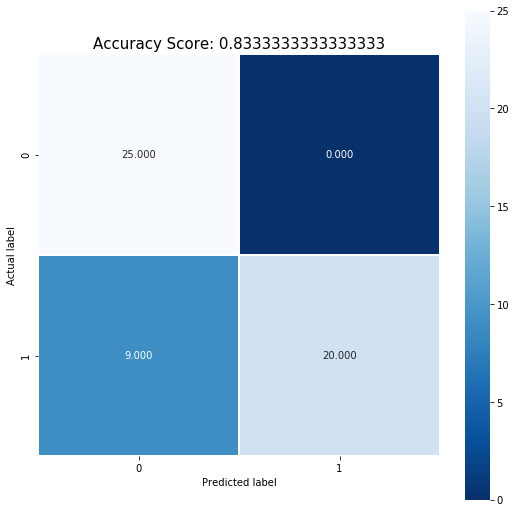

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(np.mean(scores))
plt.title(all_sample_title, size = 15);

In [24]:
y_pred_prob =logreg.predict_proba(X_test)[:,1]
fpr, tpr, threasholds = roc_curve(y_test, y_pred_prob)

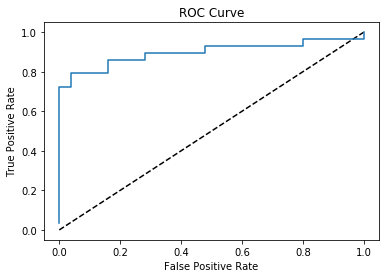

In [25]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [26]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8979310344827587


In [185]:
cv_auc = cross_val_score(logreg, X,y,cv=5,scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print(np.mean(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.83125  0.915625 0.9875   0.778125 0.853125]
0.8731249999999999


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42, verbose = 1, n_jobs=-1)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
score = random_forest.score(X_test, y_test)
scores = cross_val_score(random_forest, X, y, cv=5)
score

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_job

0.8333333333333334

In [32]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[25,  0],
       [ 9, 20]])

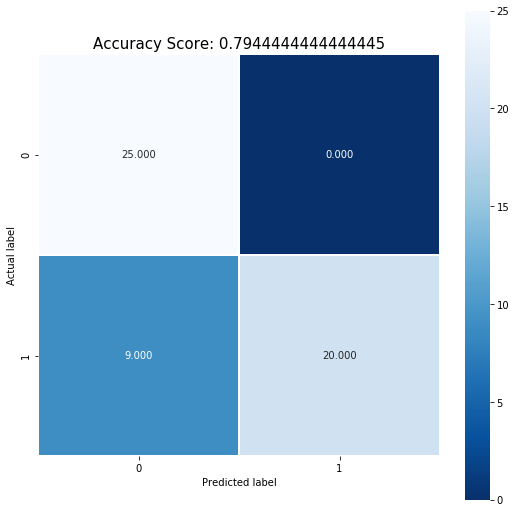

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(np.mean(scores))
plt.title(all_sample_title, size = 15);

In [34]:
y_pred_prob =random_forest.predict_proba(X_test)[:,1]
fpr, tpr, threasholds = roc_curve(y_test, y_pred_prob)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


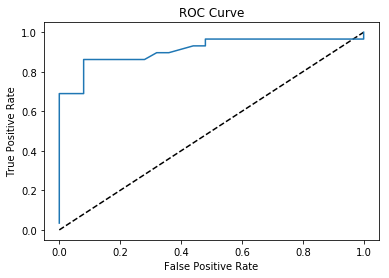

In [35]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [147]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9110344827586206


In [148]:
cv_auc = cross_val_score(random_forest, X,y,cv=5,scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print(np.mean(cv_auc))

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jo

AUC scores computed using 5-fold cross-validation: [0.85      0.9578125 0.965625  0.803125  0.8640625]
0.8881249999999999


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [149]:
features = list(X.columns)

feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [150]:
feature_importances

,feature,importance
0,slope_of_peak_exercise_st_segment,0.070806
1,resting_blood_pressure,0.066398
2,chest_pain_type,0.075099
3,num_major_vessels,0.088744
4,fasting_blood_sugar_gt_120_mg_per_dl,0.010218
5,resting_ekg_results,0.025117
6,serum_cholesterol_mg_per_dl,0.086874
7,oldpeak_eq_st_depression,0.128203
8,sex,0.016317
9,age,0.081501


Feature ranking:
1. feature 7 (0.128203)
2. feature 10 (0.118240)
3. feature 13 (0.093594)
4. feature 3 (0.088744)
5. feature 6 (0.086874)
6. feature 9 (0.081501)
7. feature 2 (0.075099)
8. feature 12 (0.072313)
9. feature 0 (0.070806)
10. feature 11 (0.066576)
11. feature 1 (0.066398)
12. feature 5 (0.025117)
13. feature 8 (0.016317)
14. feature 4 (0.010218)


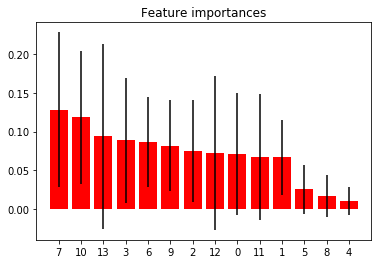

In [151]:
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))    
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [36]:
list(X.columns)

['slope_of_peak_exercise_st_segment',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'thal_normal',
 'thal_reversible_defect']

In [37]:
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")

In [38]:
X, y = preprocess(train_values, train_labels, 'heart_disease_present')

In [39]:
X = X.drop(columns=['thal_reversible_defect', 'sex', 'exercise_induced_angina'])
X.shape

(180, 11)

In [40]:
X_train, X_test, y_train, y_test = split(X,y)

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (126, 11)
Testing data shape:  (54, 11)


In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
scores = cross_val_score(logreg, X, y, cv=5)

np.mean(scores)

0.8333333333333333

In [43]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[24,  1],
       [10, 19]])

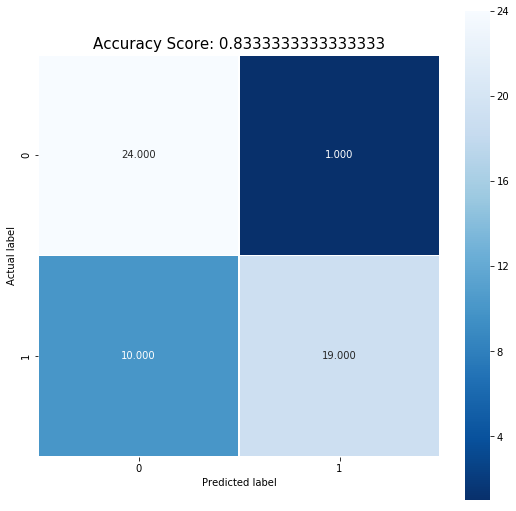

In [44]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(np.mean(scores))
plt.title(all_sample_title, size = 15);

In [45]:
y_pred_prob =logreg.predict_proba(X_test)[:,1]
fpr, tpr, threasholds = roc_curve(y_test, y_pred_prob)

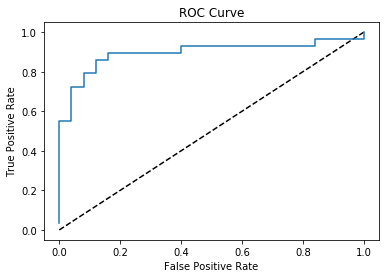

In [46]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [47]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8965517241379312


In [48]:
cv_auc = cross_val_score(logreg, X,y,cv=5,scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print(np.mean(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.815625 0.928125 0.99375  0.8      0.8875  ]
0.885


In [165]:
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")

X, y = preprocess(train_values, train_labels, 'heart_disease_present')
X_train, X_test, y_train, y_test = split(X,y)
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (126, 14)
Testing data shape:  (54, 14)


In [166]:
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")

X, y = preprocess(train_values, train_labels, 'heart_disease_present')


In [167]:
X['CatAge'] = pd.qcut(X.age, q=4, labels=False)
X['Catrbp'] = pd.qcut(X['resting_blood_pressure'], q=8, labels=False)
X['CatSerum'] = pd.qcut(X['serum_cholesterol_mg_per_dl'], q=4, labels=False)
X['CatMaxhr'] = pd.qcut(X['max_heart_rate_achieved'], q=4, labels=False)



In [168]:
X = X.drop(['age','resting_blood_pressure','serum_cholesterol_mg_per_dl', 'max_heart_rate_achieved'], axis=1)
X.shape

(180, 14)

In [169]:
X = X.drop(columns=['fasting_blood_sugar_gt_120_mg_per_dl', 'sex', 'resting_ekg_results'])
X.shape

(180, 11)

In [170]:
X_train, X_test, y_train, y_test = split(X,y)

In [171]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (126, 11)
Testing data shape:  (54, 11)


In [172]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
scores = cross_val_score(logreg, X, y, cv=5)

np.mean(scores)

0.8277777777777777

In [173]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[25,  0],
       [ 8, 21]])

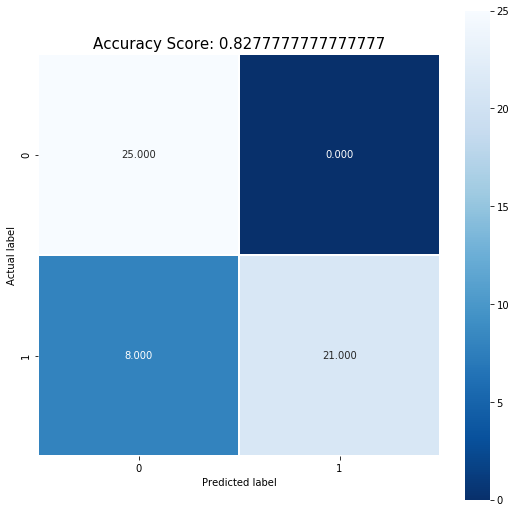

In [174]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(np.mean(scores))
plt.title(all_sample_title, size = 15);

In [175]:
y_pred_prob =logreg.predict_proba(X_test)[:,1]
fpr, tpr, threasholds = roc_curve(y_test, y_pred_prob)

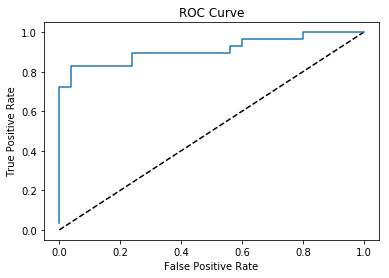

In [176]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [177]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9117241379310345


In [178]:
cv_auc = cross_val_score(logreg, X,y,cv=5,scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print(np.mean(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.83125  0.915625 0.9875   0.778125 0.853125]
0.8731249999999999
